# CAPSTONE


#### Instructions:
Write python codes to answer all the 7 questions. 
Save the python notebook as (.ipynb) file.
Prepare power point slides to present the output of every question.
One group needs to submit only one folder including python notebook and power point slides and upload to the submission folder. 

#### Perform data cleaning/ pre-processing before starting the data analysis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns 
import glob
import os

Question 1: Load the given data and **describe** the dataset using variable type, data type, total column, total rows and other parameters. 

In [2]:
positive_list = glob.glob("./data/positive/*.json")
negative_list = glob.glob("./data/negative/*.json")

positive_list.sort()
negative_list.sort()

data = pd.DataFrame(columns=('text', 'label'))
data.head()

,text,label


In [3]:
df = pd.read_json(positive_list[0])
df['label'] = 1

data = df.copy()

df = pd.read_json(negative_list[0])
df['label'] = 0

data = pd.concat([data, df])

print(data.shape)
data.head()

(95778, 2)


,0,label
0,saya sayang awak adalah yang terbaik! !,1
1,dia mempunyai kesan ke atas semua orang,1
2,Terima kasih untuk maklum balas anda . saya su...,1
3,"ah, selamatkan mr fletcher untuk akhirnya berg...",1
4,Saya menjawab kucing bodoh membantu saya menai...,1


In [14]:
print(data.label.value_counts())
print("Negative percentage: {}%".format( (data.label.value_counts()[0] / data.shape[0]) * 100))
print("Positive percentage: {}%".format( (data.label.value_counts()[1] / data.shape[0]) * 100))
data.describe()

0    48249
1    47529
Name: label, dtype: int64
Negative percentage: 50.375869197519265%
Positive percentage: 49.624130802480735%


,label
count,95778.000000
mean,0.496241
std,0.499988
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Question 2: Describe the **categorical variables** available in the dataset.  **Visualise** the results based on your creativity. 

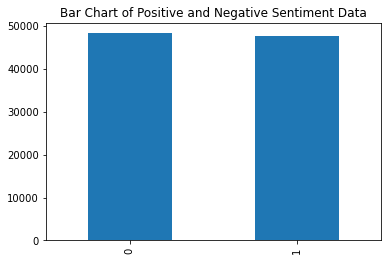

In [22]:
data.label.value_counts().plot.bar(title = "Bar Chart of Positive and Negative Sentiment Data");

In [4]:
import malaya
# import sys

quantized_model = malaya.toxicity.transformer(model = 'tiny-albert', quantized = True)
r1 = np.empty(0)

C:\Users\susan\anaconda3\lib\site-packages\malaya_boilerplate\frozen_graph.py:34: UserWarning: Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0
  warnings.warn(
Load quantized model will cause accuracy drop.


In [ ]:
# test = quantized_model.predict_proba(list(reddit_comment_data['comment'][0:10]))
for i in range(0, len(data), 50):
  if i+50 < len(data):
    print(i, i+50, "x")
    r0 = quantized_model.predict_proba(list(data[0][i:i+50]))
    r1 = np.append(r1, r0, axis=0)
  else:
    print(i, len(reddit_comment_data), "Y")
    len_data = len(reddit_comment_data)
    r0 = quantized_model.predict_proba(list(reddit_comment_data['comment'][i:len_data]))
    r1 = np.append(r1, r0, axis=0)

# test = dict(sorted(r1[0].items(), key=lambda x:x[1],reverse=True))  # get the most tosic category 
# test = r1[0] # get the first row of toxicity
# test = [x.get('severe toxic') for x in r1]  # get all rows of 'severe toxic'


toxicity = pd.DataFrame.from_records(r1)
toxicity = pd.concat([reddit_comment_data['comment'], toxicity], axis=1)
# plot_img  = plt.figure(figsize = (7, 7))
# plt.scatter(range(0,len(r1)), [x.get('positive') for x in r1])

# positive = pd.DataFrame({'positive':toxicity})
# positive = pd.concat([positive, pd.DataFrame(reddit_comment_data['date'])], axis=1)
toxicity.to_csv("./panel4_reddit/toxicity_analysis/toxicity.csv", encoding="utf-8", index=False)

Question 3: Present the **distribution** of each variable in the dataset. **Interpret** the results.

Question 4: Present the **correlation** between all the **numeric variables**. **Explain** the relationship between the variables using correlation values.

Question 5: Calculate the measures of **central tendancy** and **measures of dispersion** for all the numerical variables. <br>
1. Central tendancy: Mean, median, mode
2. Measure of dispersion: Variance, Standard Deviation

Question 6: Consider the given data as entity 1. Design **two more related entities** (entity 2 and entity 3) and design one entity relationship diagram to relate all the three entities.  <br>
1. create the variable , but no need the data values

Question 7: Develop **3 problem statements** for the given dataset.

Question 8: Write **3 different SQL statements** to extract specific data from entity1, entity 2 and entity 3 to solve the problems designed in **Question 7**. (combine data from different tables) <br>
1. what can be observe from the entity 
2. then how to resolve it by using sql?